In [ ]:
pip install google-generativeai


In [ ]:
pip install --upgrade google-generativeai


In [ ]:
import google.generativeai as genai

# For testing Gemini
# Set the API key directly
genai.configure(api_key="Replace with your API KEY here")

# Initialize the model
model = genai.GenerativeModel("gemini-1.5-flash")

# Generate content
response = model.generate_content("Tell me about UX/UI dark patterns")

# Print the generated content
print(response.text)


## Dark Patterns in UX/UI: The Sneaky Tricks Designers Use

Dark patterns are user interface design tricks that manipulate users into taking actions they wouldn't normally take. They exploit cognitive biases and psychological vulnerabilities to achieve business goals, often at the expense of the user's interests. 

**Think of it like this:** Imagine a website with a free trial offer. You think you're signing up for a trial, but it's designed to automatically charge you after the trial period ends, making it harder than expected to cancel. That's a dark pattern!

Here are some common types of dark patterns:

**1. Hidden Costs and Fees:**

* **Bait and Switch:**  Attracting users with a low price but then adding hidden fees later on.
* **Tricky Trial Periods:** Offering free trials but making it difficult to cancel or automatically charging users after the trial ends.
* **Excessive Shipping Costs:**  Charging exorbitant shipping fees to make the final price seem higher than it really is.

**Step 1: Import Libraries**

In [ ]:
import os, pandas as pd, time; from google.colab import drive; import google.generativeai as genai


**Step 2: Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Define input folder path
INPUT_FOLDER = "/content/drive/My Drive/mixed"

# Verify input folder
if not os.path.exists(INPUT_FOLDER):
    print(f"Error: Input folder does not exist at {INPUT_FOLDER}")
else:
    print(f"Input folder verified: {INPUT_FOLDER}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Input folder verified: /content/drive/My Drive/mixed


**Step 3: Connect to LLM API using API Key**

In [ ]:

API_KEY = "Replace with your API KEY here"

genai.configure(api_key=API_KEY)

try:
    # Test connection with a simple chat prompt
    model = genai.GenerativeModel('gemini-1.5-pro')
    response = model.generate_content("Hello, LLM! Can you respond?")
    print(f"LLM Response: {response.text.strip()}")
except Exception as e:
    print(f"Error connecting to LLM: {e}")



LLM Response: Hello! Yes, I can respond. How can I help you today?


**Step 4:Give LLM access to data and perform basic operations**

In [ ]:

def test_llm_with_data(model):
    # Load a sample dataset
    sample_file = os.path.join(INPUT_FOLDER, os.listdir(INPUT_FOLDER)[0])
    df = pd.read_csv(sample_file, nrows=5)
    print("Sample Data (First 5 rows):")
    print(df)

    # Ask LLM to describe the dataset
    prompt = f"Analyze the following dataset:\n{df.to_string()}\nWhat can you infer?"
    response = model.generate_content(prompt).text
    print("LLM Analysis Response:", response)

if model:
    test_llm_with_data(model)


Sample Data (First 5 rows):
   duration protocoltype service flag  srcbytes  dstbytes  land  \
0         0          tcp    smtp   SF      1239       400     0   
1         0          tcp    http   SF       222       945     0   
2         0          tcp    http   SF       235      1380     0   
3         0          tcp    http   SF       348      2029     0   
4         0          tcp    http   SF       242       380     0   

   wrongfragment  urgent  hot  ...  dsthostsamesrvrate  dsthostdiffsrvrate  \
0              0       0    0  ...                0.45                0.04   
1              0       0    0  ...                1.00                0.00   
2              0       0    0  ...                1.00                0.00   
3              0       0    0  ...                1.00                0.00   
4              0       0    0  ...                1.00                0.00   

   dsthostsamesrcportrate  dsthostsrvdiffhostrate  dsthostserrorrate  \
0                    0.00   

**Step 5: Classify Files**

In [ ]:

OUTPUT_FOLDER = "/content/drive/My Drive/classifieddata_GeminiAI"

# Create classifieddata folder here
os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"Classifieddata folder created: {OUTPUT_FOLDER}")

# Function to classify files and save serially
def classify_and_save_files():
    # Make sure necessary imports are available
    import os
    import pandas as pd

    csv_files = sorted([f for f in os.listdir(INPUT_FOLDER) if f.endswith('.csv')])

    for filename in csv_files:
        file_path = os.path.join(INPUT_FOLDER, filename)
        df = pd.read_csv(file_path)

        # Modified prompt to be more generic and focused on network behavior
        prompt = f"""Analyze this network traffic dataset and determine if it represents normal network behavior or if there's any suspicious/malicious activity. If malicious, specify the type of attack pattern you observe.

        Consider these key aspects in your analysis:
        - Traffic patterns and flow characteristics
        - Source and destination behaviors
        - Protocol usage and patterns
        - Any anomalous indicators

        Dataset:
        {df.to_string()}

        Provide only your final classification as a single line response starting with either "Attack:" (followed by the specific type) or "Benign".
        """

        try:
            # Generate response using Gemini
            response = model.generate_content(prompt)

            # Extract the result from Gemini's response
            result = response.text.strip()

            # Process the result to determine the new filename
            if "Attack:" in result:
                # If an attack is detected
                attack_type = result.split(":")[1].strip().upper()
                base_name, ext = os.path.splitext(filename)
                new_filename = f"{base_name}.{attack_type}{ext}"
            else:
                # If no attack (Benign) is detected, keep the filename unchanged
                new_filename = filename

            # Save the file with the new serial name (or original name if no attack)
            new_path = os.path.join(OUTPUT_FOLDER, new_filename)
            df.to_csv(new_path, index=False)
            print(f"File {filename} classified as {result}. Saved as {new_filename}")

        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# Call the function
try:
    classify_and_save_files()
except Exception as e:
    print(f"Error in classify_and_save_files: {e}")

Classifieddata folder created: /content/drive/My Drive/classifieddata_GeminiAI
File 01.csv classified as Benign. Saved as 01.csv
File 02.csv classified as Attack: FTP-BruteForce. Saved as 02.FTP-BRUTEFORCE.csv
File 03.csv classified as Benign. Saved as 03.csv
File 04.csv classified as Benign. Saved as 04.csv
File 05.csv classified as Attack: Kernel Exploitation. Saved as 05.KERNEL EXPLOITATION.csv
File 06.csv classified as Benign. Saved as 06.csv
File 07.csv classified as Benign. Saved as 07.csv
File 08.csv classified as Attack: Distributed Denial of Service (DDoS). Saved as 08.DISTRIBUTED DENIAL OF SERVICE (DDOS).csv
File 09.csv classified as Attack: Brute Force Attacks. Saved as 09.BRUTE FORCE ATTACKS.csv
File 10.csv classified as Benign. Saved as 10.csv
File 11.csv classified as Benign. Saved as 11.csv
File 12.csv classified as Attack: Ransomware. Saved as 12.RANSOMWARE.csv
File 13.csv classified as Attack: Fragmented Packet Attacks. Saved as 13.FRAGMENTED PACKET ATTACKS.csv
File 14

<ipython-input-4-b5b2058970f6>:17: DtypeWarning: Columns (2,5,30,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Error processing file 19.csv: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: unknown error
File 20.csv classified as Benign. Saved as 20.csv
File 21.csv classified as Attack: ARP_Spoofing. Saved as 21.ARP_SPOOFING.csv
File 22.csv classified as Attack: Denial-of-service. Saved as 22.DENIAL-OF-SERVICE.csv
File 23.csv classified as Attack: Time-based SQL Injection. Saved as 23.TIME-BASED SQL INJECTION.csv
File 24.csv classified as Attack: SSH-Bruteforce. Saved as 24.SSH-BRUTEFORCE.csv


**Step 6: Evaluate Results**

In [ ]:

import os
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define paths - Update these paths according to your directory structure
GROUND_TRUTH_FOLDER = "/content/drive/My Drive/Ground"
OUTPUT_FOLDER = "/content/drive/My Drive/classifieddata_GeminiAI"

def get_attack_type_from_filename(filename):
    """Extract attack type from filename if present"""
    parts = filename.split('.')
    if len(parts) > 2:
        return parts[1].lower()
    return None

def evaluate_classification():
    print("Starting evaluation...")
    try:
        # Get ground truth from filenames
        ground_truth = {}
        for filename in os.listdir(GROUND_TRUTH_FOLDER):
            if filename.endswith('.csv'):
                file_number = filename.split('.')[0]  # Get the number part
                attack_type = get_attack_type_from_filename(filename)
                ground_truth[file_number] = {
                    'is_attack': attack_type is not None,
                    'attack_type': attack_type
                }

        # Get predictions
        predictions = {}
        for filename in os.listdir(OUTPUT_FOLDER):
            if filename.endswith('.csv'):
                file_number = filename.split('.')[0]  # Get the number part
                attack_type = get_attack_type_from_filename(filename)
                predictions[file_number] = {
                    'is_attack': attack_type is not None,
                    'attack_type': attack_type
                }

        # Prepare labels for metrics calculation
        true_labels = []
        pred_labels = []
        type_matches = 0
        total_attacks = 0

        # Print detailed comparison
        print("\nFile-by-file Comparison:")
        print("File\tGround Truth\tPrediction\tMatch\tAttack Type Match")
        print("-" * 70)

        for file_number in sorted(ground_truth.keys()):
            if file_number in predictions:
                true_val = ground_truth[file_number]['is_attack']
                pred_val = predictions[file_number]['is_attack']
                true_type = ground_truth[file_number]['attack_type']
                pred_type = predictions[file_number]['attack_type']

                true_labels.append(1 if true_val else 0)
                pred_labels.append(1 if pred_val else 0)

                match = "✓" if true_val == pred_val else "✗"
                type_match = "✓" if true_type == pred_type else "✗"

                if true_val:
                    total_attacks += 1
                    if true_type == pred_type:
                        type_matches += 1

                print(f"{file_number}\t{'Attack' if true_val else 'Benign'}\t"
                      f"{'Attack' if pred_val else 'Benign'}\t{match}\t{type_match}")

        # Calculate metrics
        conf_matrix = confusion_matrix(true_labels, pred_labels)
        accuracy = accuracy_score(true_labels, pred_labels)
        precision = precision_score(true_labels, pred_labels)
        recall = recall_score(true_labels, pred_labels)
        f1 = f1_score(true_labels, pred_labels)
        attack_type_accuracy = type_matches / total_attacks if total_attacks > 0 else 0

        # Print evaluation metrics
        print("\nEvaluation Metrics:")
        print("-" * 30)
        print("\nConfusion Matrix:")
        print("            Predicted")
        print("             No  Yes")
        print("Actual No   {:3d}  {:3d}".format(conf_matrix[0][0], conf_matrix[0][1]))
        print("      Yes  {:3d}  {:3d}".format(conf_matrix[1][0], conf_matrix[1][1]))

        print("\nBinary Classification Metrics:")
        print(f"Accuracy:  {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall:    {recall:.4f}")
        print(f"F1 Score:  {f1:.4f}")

        print("\nAttack Type Classification:")
        print(f"Attack Type Accuracy: {attack_type_accuracy:.4f}")

        return {
            'confusion_matrix': conf_matrix,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'attack_type_accuracy': attack_type_accuracy
        }

    except Exception as e:
        print(f"Evaluation error: {e}")
        import traceback
        print(traceback.format_exc())
        return None

# Execute the evaluation
if __name__ == "__main__":
    metrics = evaluate_classification()

Starting evaluation...

File-by-file Comparison:
File	Ground Truth	Prediction	Match	Attack Type Match
----------------------------------------------------------------------
01	Attack	Benign	✗	✗
02	Attack	Attack	✓	✗
03	Benign	Benign	✓	✓
04	Benign	Benign	✓	✓
05	Attack	Attack	✓	✓
06	Benign	Benign	✓	✓
07	Benign	Benign	✓	✓
08	Attack	Attack	✓	✓
09	Attack	Attack	✓	✗
10	Benign	Benign	✓	✓
11	Benign	Benign	✓	✓
12	Attack	Attack	✓	✗
13	Attack	Attack	✓	✗
14	Attack	Benign	✗	✗
15	Benign	Benign	✓	✓
16	Benign	Benign	✓	✓
17	Benign	Benign	✓	✓
18	Benign	Benign	✓	✓
20	Benign	Benign	✓	✓
21	Attack	Attack	✓	✓
22	Attack	Attack	✓	✓
23	Attack	Attack	✓	✓
24	Attack	Attack	✓	✓

Evaluation Metrics:
------------------------------

Confusion Matrix:
            Predicted
             No  Yes
Actual No    11    0
      Yes    2   10

Binary Classification Metrics:
Accuracy:  0.9130
Precision: 1.0000
Recall:    0.8333
F1 Score:  0.9091

Attack Type Classification:
Attack Type Accuracy: 0.5000


**Step 6: Evaluate Results with graphs **

In [ ]:
pip install matplotlib seaborn numpy pandas scikit-learn

Starting evaluation...

File-by-file Comparison:
File	Ground Truth	Prediction	Match	Attack Type Match
----------------------------------------------------------------------
01	Attack	Benign	✗	✗
02	Attack	Attack	✓	✗
03	Benign	Benign	✓	✓
04	Benign	Benign	✓	✓
05	Attack	Attack	✓	✓
06	Benign	Benign	✓	✓
07	Benign	Benign	✓	✓
08	Attack	Attack	✓	✓
09	Attack	Attack	✓	✗
10	Benign	Benign	✓	✓
11	Benign	Benign	✓	✓
12	Attack	Attack	✓	✗
13	Attack	Attack	✓	✗
14	Attack	Benign	✗	✗
15	Benign	Benign	✓	✓
16	Benign	Benign	✓	✓
17	Benign	Benign	✓	✓
18	Benign	Benign	✓	✓
20	Benign	Benign	✓	✓
21	Attack	Attack	✓	✓
22	Attack	Attack	✓	✓
23	Attack	Attack	✓	✓
24	Attack	Attack	✓	✓

Evaluation Metrics:
------------------------------

Confusion Matrix:
            Predicted
             No  Yes
Actual No    11    0
      Yes    2   10

Binary Classification Metrics:
Accuracy:  0.9130
Precision: 1.0000
Recall:    0.8333
F1 Score:  0.9091

Attack Type Classification:
Attack Type Accuracy: 0.5000


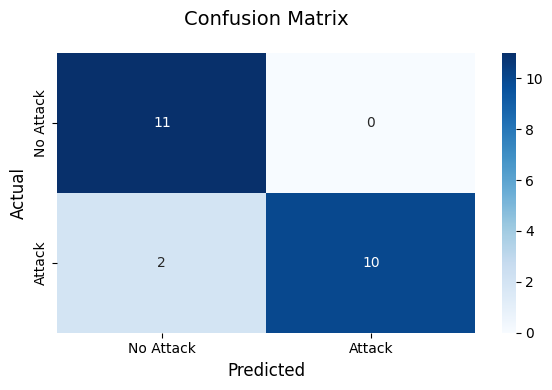

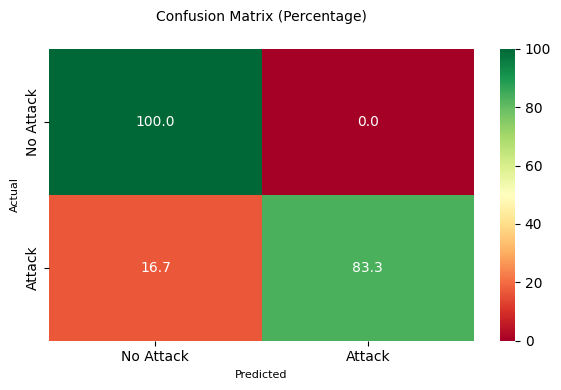

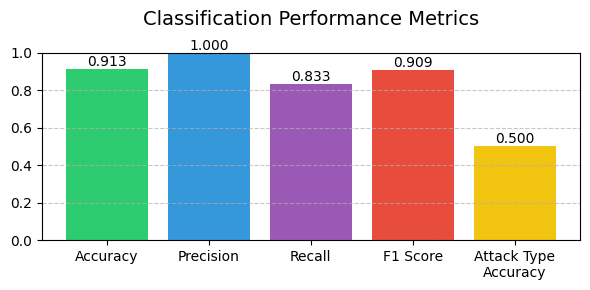

In [ ]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


GROUND_TRUTH_FOLDER = "/content/drive/My Drive/Ground"
OUTPUT_FOLDER = "/content/drive/My Drive/classifieddata_GeminiAI"

def get_attack_type_from_filename(filename):
    """Extract attack type from filename if present"""
    parts = filename.split('.')
    if len(parts) > 2:
        return parts[1].lower()
    return None

def plot_confusion_matrix_heatmap(conf_matrix):
    """Plot confusion matrix as a heatmap"""
    plt.figure(figsize=(6, 4))

    # Create heatmap
    sns.heatmap(conf_matrix,
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=['No Attack', 'Attack'],
                yticklabels=['No Attack', 'Attack'])

    plt.title('Confusion Matrix', pad=20, size=14)
    plt.ylabel('Actual', size=12)
    plt.xlabel('Predicted', size=12)

    plt.tight_layout()
    plt.show()

def plot_metrics_bar(metrics_dict):
    """Plot performance metrics as a bar chart"""
    metrics_to_plot = {
        'Accuracy': metrics_dict['accuracy'],
        'Precision': metrics_dict['precision'],
        'Recall': metrics_dict['recall'],
        'F1 Score': metrics_dict['f1_score'],
        'Attack Type\nAccuracy': metrics_dict['attack_type_accuracy']
    }

    plt.figure(figsize=(6, 3))
    colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f1c40f']

    # Create bar plot
    bars = plt.bar(metrics_to_plot.keys(), metrics_to_plot.values(), color=colors)
    plt.ylim(0, 1)
    plt.title('Classification Performance Metrics', pad=20, size=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

def plot_percentage_matrix(conf_matrix):
    """Plot confusion matrix as percentages"""
    plt.figure(figsize=(6, 4))

    # Convert to percentages
    conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

    # Create heatmap
    sns.heatmap(conf_matrix_percent,
                annot=True,
                fmt='.1f',
                cmap='RdYlGn',
                xticklabels=['No Attack', 'Attack'],
                yticklabels=['No Attack', 'Attack'])

    plt.title('Confusion Matrix (Percentage)', pad=20, size=10)
    plt.ylabel('Actual', size=8)
    plt.xlabel('Predicted', size=8)

    plt.tight_layout()
    plt.show()

def evaluate_classification():
    print("Starting evaluation...")
    try:
        # Get ground truth from filenames
        ground_truth = {}
        for filename in os.listdir(GROUND_TRUTH_FOLDER):
            if filename.endswith('.csv'):
                file_number = filename.split('.')[0]
                attack_type = get_attack_type_from_filename(filename)
                ground_truth[file_number] = {
                    'is_attack': attack_type is not None,
                    'attack_type': attack_type
                }

        # Get predictions
        predictions = {}
        for filename in os.listdir(OUTPUT_FOLDER):
            if filename.endswith('.csv'):
                file_number = filename.split('.')[0]
                attack_type = get_attack_type_from_filename(filename)
                predictions[file_number] = {
                    'is_attack': attack_type is not None,
                    'attack_type': attack_type
                }

        # Prepare labels for metrics calculation
        true_labels = []
        pred_labels = []
        type_matches = 0
        total_attacks = 0

        # Print detailed comparison
        print("\nFile-by-file Comparison:")
        print("File\tGround Truth\tPrediction\tMatch\tAttack Type Match")
        print("-" * 70)

        for file_number in sorted(ground_truth.keys()):
            if file_number in predictions:
                true_val = ground_truth[file_number]['is_attack']
                pred_val = predictions[file_number]['is_attack']
                true_type = ground_truth[file_number]['attack_type']
                pred_type = predictions[file_number]['attack_type']

                true_labels.append(1 if true_val else 0)
                pred_labels.append(1 if pred_val else 0)

                match = "✓" if true_val == pred_val else "✗"
                type_match = "✓" if true_type == pred_type else "✗"

                if true_val:
                    total_attacks += 1
                    if true_type == pred_type:
                        type_matches += 1

                print(f"{file_number}\t{'Attack' if true_val else 'Benign'}\t"
                      f"{'Attack' if pred_val else 'Benign'}\t{match}\t{type_match}")

        # Calculate metrics
        conf_matrix = confusion_matrix(true_labels, pred_labels)
        accuracy = accuracy_score(true_labels, pred_labels)
        precision = precision_score(true_labels, pred_labels)
        recall = recall_score(true_labels, pred_labels)
        f1 = f1_score(true_labels, pred_labels)
        attack_type_accuracy = type_matches / total_attacks if total_attacks > 0 else 0

        # Print evaluation metrics
        print("\nEvaluation Metrics:")
        print("-" * 30)
        print("\nConfusion Matrix:")
        print("            Predicted")
        print("             No  Yes")
        print("Actual No   {:3d}  {:3d}".format(conf_matrix[0][0], conf_matrix[0][1]))
        print("      Yes  {:3d}  {:3d}".format(conf_matrix[1][0], conf_matrix[1][1]))

        print("\nBinary Classification Metrics:")
        print(f"Accuracy:  {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall:    {recall:.4f}")
        print(f"F1 Score:  {f1:.4f}")

        print("\nAttack Type Classification:")
        print(f"Attack Type Accuracy: {attack_type_accuracy:.4f}")

        # Create metrics dictionary
        metrics_dict = {
            'confusion_matrix': conf_matrix,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'attack_type_accuracy': attack_type_accuracy
        }

        # Plot all visualizations
        plot_confusion_matrix_heatmap(conf_matrix)
        plot_percentage_matrix(conf_matrix)
        plot_metrics_bar(metrics_dict)

        return metrics_dict

    except Exception as e:
        print(f"Evaluation error: {e}")
        import traceback
        print(traceback.format_exc())
        return None

# Execute the evaluation
if __name__ == "__main__":
    metrics = evaluate_classification()